In [26]:
#Authentication

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

#Data Loading

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:

link ='https://drive.google.com/open?id=1ntjxiHT6c619MJb5JYjmQtLZAgKsgTrW'

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('Dataset.csv')

train_news = pd.read_csv('Dataset.csv',encoding= 'unicode_escape')

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
print(train_news.shape)

train_news.head()


(2225, 2)


,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


In [31]:
print("Checking data qualitites...")

train_news.isnull().sum()
train_news.info()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


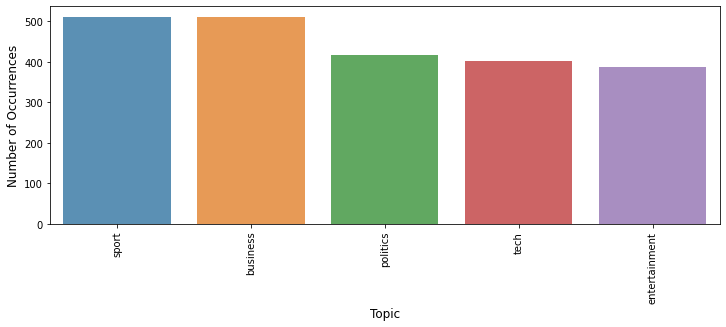

In [32]:
topic = train_news['type'].value_counts()

plt.figure(figsize=(12,4))

sns.barplot(topic.index, topic.values, alpha=0.8)

plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Topic', fontsize=12)

plt.xticks(rotation=90)

plt.show()

#Data Preprocessing

In [33]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re, string, unicodedata
import spacy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
"""Remove non-ASCII characters from list of tokenized words"""

def remove_non_ascii(words):
    
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [35]:
"""Convert all characters to lowercase from list of tokenized words"""

def to_lowercase(words):
    
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [36]:
"""Remove non-alphabet from list of tokenized words"""

def remove_non_alpha(words):
    
    new_words = []
    for word in words:
        new_word = re.sub(r'[^a-zA-Z]', "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [37]:
 """Remove stop words from list of tokenized words"""
 
def remove_stopwords(words):
   
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [38]:

"""Lemmatize words in whole text"""

nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatize(clean_text):
   
    doc = nlp(clean_text)
    s=" ".join([token.lemma_ for token in doc])
    return s
    


In [39]:


def clean_text(text):
  words = nltk.word_tokenize(text)

  words = remove_non_ascii(words)

  words = to_lowercase(words)

  words = remove_non_alpha(words)

  words = remove_stopwords(words)

  clean_text=" ".join([token for token in words])

  lemmatize_text=lemmatize(clean_text)

  return lemmatize_text
  

In [40]:
#Before Cleaning

train_news['news'][0]

'China had role in Yukos split-up\n \n China lent Russia $6bn (Â£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n \n The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n \n According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s former owner, if CNPC had become a shareholder. Rosneft an

In [41]:
#Cleaning of whole news Dataset

train_news['news']=train_news['news'].apply(clean_text)

In [42]:
#After Cleaning

train_news['news'][0]

'china role yukos splitup china lend russia bn abn help russian government renationalise key yuganskneftegas unit oil group yukos reveal kremlin say tuesday bn russian state bank veb lend stateowne rosneft help buy yugansk turn come chinese bank revelation come russian government say rosneft sign longterm oil supply deal china deal see rosneft receive bn credit china cnpc accord russian newspaper vedomosti credit would use pay loan rosneft receive finance purchase yugansk report say cnpc offer yugansk return provide finance company opt longterm oil supply deal instead analyst say one factor may influenced chinese decision possibility litigation yukos yugansk former owner cnpc become shareholder rosneft veb decline comment two company rosneft cnpc agree prepayment longterm deliveries say russian oil official sergei oganesyan nothing unusual prepayment five six year announcement help explain rosneft mediumsize indebte relatively unknown firm able finance surprise purchase yugansk yugansk

#Highlighting Frequent Word for each Category

In [43]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [44]:
#function to grenerate word cloud

def MakeWordCloud(genre,type):
  wordcloud = WordCloud(background_color="black", width = 1000, height = 500).generate(''.join(str(genre['news'])))
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud)
  plt.title(type, fontsize=30)
  plt.axis("off")
  plt.show()

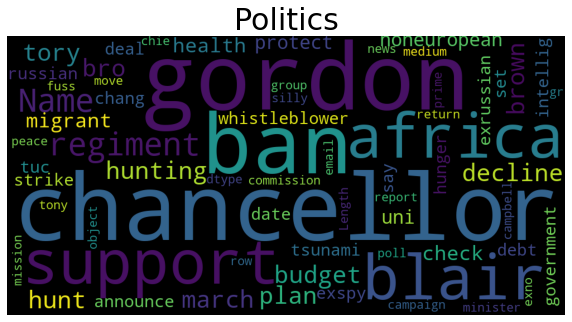

In [45]:
#politics

politics = train_news[train_news['type'] == 'politics']

MakeWordCloud(politics,"Politics")

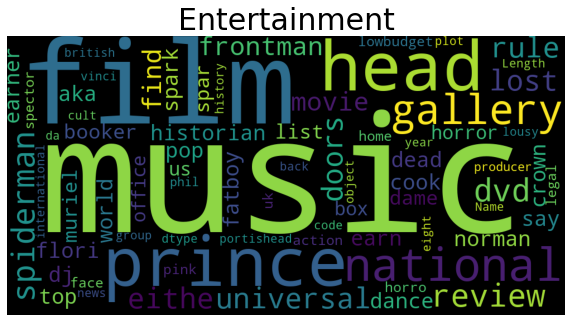

In [46]:
#entertainment

entertainment = train_news[train_news['type'] == 'entertainment']

MakeWordCloud(entertainment,"Entertainment")

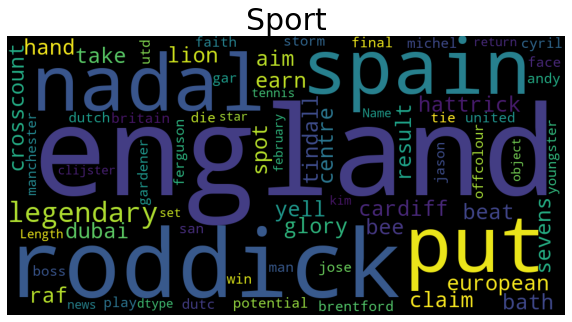

In [47]:
#sport

sport = train_news[train_news['type'] == 'sport']

MakeWordCloud(sport,"Sport")

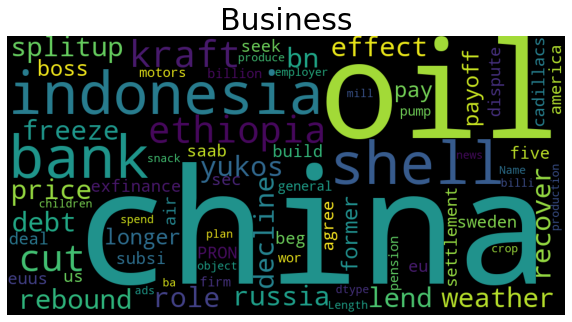

In [48]:

#business

business = train_news[train_news['type'] == 'business']

MakeWordCloud(business,"Business")

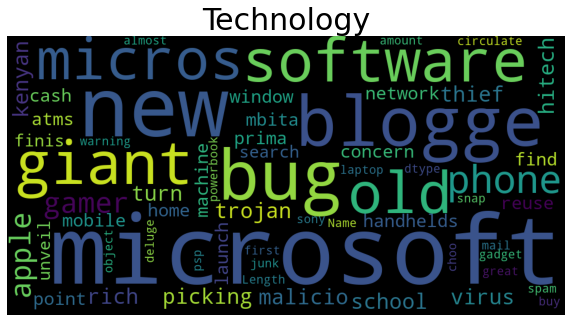

In [49]:
#technology

technology = train_news[train_news['type'] == 'tech']

MakeWordCloud(technology,"Technology")

In [50]:

x_train=train_news['news']
y_train=train_news['type']

In [51]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y_train=le.fit_transform(y_train)

keys = le.classes_

values = le.transform(le.classes_)

dictionary = dict(zip(keys, values))

print(dictionary)

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


In [52]:
category_to_id = {'business':0,  'entertainment':1, 'politics':2, 'sport':3,'tech':4}

id_to_category = {0: 'business', 1: 'entertainment' , 2: 'politics', 3: 'sport',4: 'tech'}


In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=1056)



In [54]:

print("Training Data after splitting:")

print(X_train.shape)
print(Y_train.shape)

Training Data after splitting:
(1668,)
(1668,)


In [55]:
print("Testing Data after splitting:")

print(X_test.shape)
print(Y_test.shape)


Testing Data after splitting:
(557,)
(557,)


In [56]:
#converting word into tf-idf vector

from sklearn.feature_extraction.text import TfidfVectorizer
model= TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english',)
model.fit(X_train)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='latin-1',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [57]:
dictionary=dict(zip(model.get_feature_names(),list(model.idf_)))

In [58]:
#Number of feature in tf-idf vectorizer
print(len(dictionary))


5886


In [59]:
w2v_words= dict()
f = open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    w2v_words[word] = coefs
f.close()


In [60]:
#calculating weighted tf-idf word2vec for training data


tfidf_feat=model.get_feature_names()

train_sent_vectors=[]

row=0

for sent in X_train:
  sent_vec=np.zeros(100)
  weight_sum=0
  for word in sent.split():
    if word in w2v_words and word in tfidf_feat:
      vec=w2v_words[word]
      tf_idf=dictionary[word]*(sent.count(word)/len(sent))
      sent_vec+=(vec*tf_idf)
      weight_sum+=tf_idf

  if weight_sum!=0:
    sent_vec/=weight_sum
  train_sent_vectors.append(sent_vec)
  row+=1      


In [61]:
#calculating weighted tf-idf word2vec for testing data

tfidf_feat=model.get_feature_names()

test_sent_vectors=[]

row=0

for sent in X_test:
  sent_vec=np.zeros(100)
  weight_sum=0
  for word in sent.split():
    if word in w2v_words and word in tfidf_feat:
      vec=w2v_words[word]
      tf_idf=dictionary[word]*(sent.count(word)/len(sent))
      sent_vec+=(vec*tf_idf)
      weight_sum+=tf_idf
      
  if weight_sum!=0:
    sent_vec/=weight_sum
  test_sent_vectors.append(sent_vec)
  row+=1   
     
X_test=test_sent_vectors

In [62]:
len(train_sent_vectors)

1668

In [63]:
# tfidf_sent_vectors

features=np.array(train_sent_vectors)

labels=Y_train

In [64]:
##dimension reduction for projecting given data on 2-d plane

from sklearn.manifold import TSNE

SAMPLE_SIZE = int(len(features) * 0.3)

np.random.seed(0)

indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)  
        
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) 

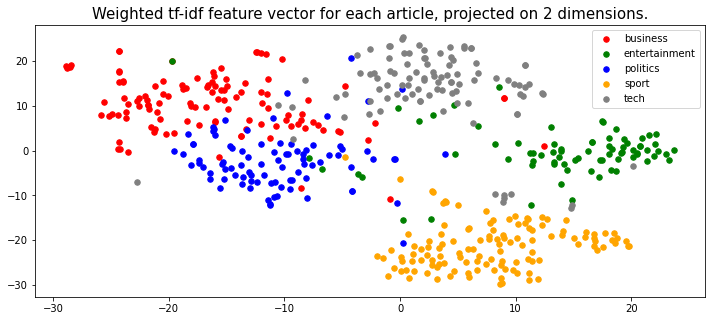

In [65]:
# Finding points belonging to each category and plot them

colors = ['red', 'green', 'blue', 'orange', 'grey']

plt.figure(figsize=(12,5))

for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id)]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)

plt.title("Weighted tf-idf feature vector for each article, projected on 2 dimensions.",fontdict=dict(fontsize=15))

plt.legend()

#Model selection and Prediction

In [66]:
# Loading required libraries for Model Selection

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC



In [67]:
models = [   
    RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0),
    SVC(kernel='rbf')
]

In [68]:

#Creating a data frame that will store the results for all 5 trials all models

CV =5

cv_df = pd.DataFrame(index=range(CV * len(models)))

# Initially all entries are empty

entries = []

#For each Algorithm 

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_weighted', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

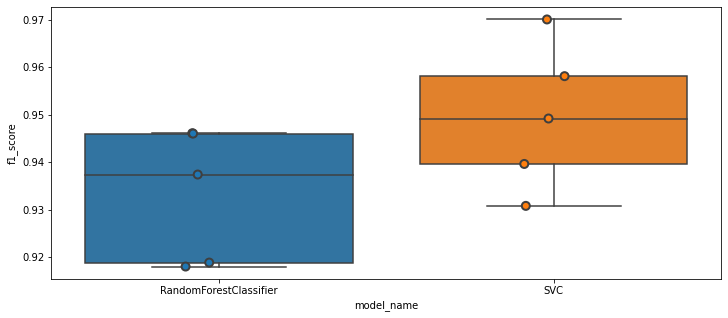

In [69]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_score'])
plt.figure(figsize=(12,5))
sns.boxplot(x='model_name', y='f1_score', data=cv_df)
sns.stripplot(x='model_name', y='f1_score', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [70]:
cv_df.groupby('model_name').f1_score.mean()

model_name
RandomForestClassifier    0.933291
SVC                       0.949587
Name: f1_score, dtype: float64

In [71]:
cv_df

,model_name,fold_idx,f1_score
0,RandomForestClassifier,0,0.937414
1,RandomForestClassifier,1,0.946116
2,RandomForestClassifier,2,0.946055
3,RandomForestClassifier,3,0.918852
4,RandomForestClassifier,4,0.918017
5,SVC,0,0.949224
6,SVC,1,0.958151
7,SVC,2,0.970107
8,SVC,3,0.930806
9,SVC,4,0.939645


In [72]:
# For Making final model using Support Vector Classifier

svc=SVC(kernel='rbf',probability=True)

svc.fit(features,labels)

X_test=np.array(X_test)

Y_pred=svc.predict(X_test)


In [73]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred, labels=[0,1, 2,]))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       121
           1       0.99      0.94      0.96        94
           2       0.89      0.93      0.91       101

   micro avg       0.93      0.93      0.93       316
   macro avg       0.93      0.93      0.93       316
weighted avg       0.93      0.93      0.93       316



In [74]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred))

0.9461400359066428


Text(0.5, 15.0, 'Predicted')

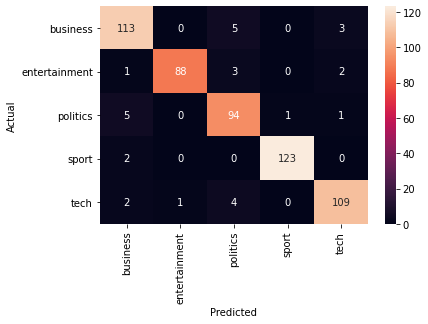

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
lbl=['business',  'entertainment', 'politics', 'sport','tech']
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=lbl, yticklabels=lbl)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [76]:
import pickle
pickle.dump(svc, open('final_model.pkl','wb'))

pickle.dump(dictionary,open("dict.pkl",'wb'))
